In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline
#%matplotlib widget

In [12]:
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.style.use('bioAI.mplstyle')

from methods import *
from plotting_functions import *

In [67]:
nx,ny = 1.2,1.2 # board size
res = 200

# initialize board
xx, yy = np.meshgrid(
    np.linspace(-nx/2, nx/2, res),
    np.linspace(-ny/2, ny/2, res),
)
board = np.stack([xx, yy], axis=-1)

# initialize grid module
fs = np.array([2, np.sqrt(2), 1])*1.5
orientation_offsets = np.random.uniform(0,360,size=3)
center = np.zeros(2)
#board += center

gridmodules = [HexagonalGCs(ncells=3,f=fs[i],init_rot=orientation_offsets[i]) for i in range(len(fs))]

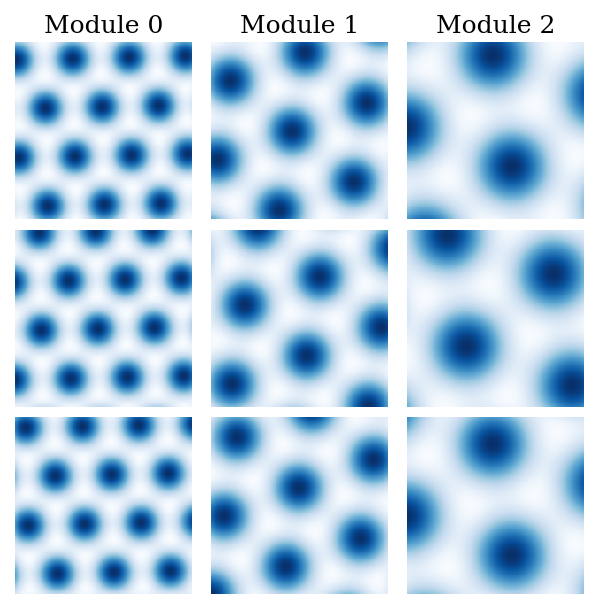

In [71]:
fig, axs = plt.subplots(ncols=3,nrows=3,figsize=(4,4))
for i,gridmodule in enumerate(gridmodules):
    ratemaps = gridmodules[i](torch.tensor(board,dtype=torch.float32).reshape(-1,2)).reshape(res,res,3).detach().numpy()
    [axs[j,i].imshow(ratemaps[...,j]) for j in range(3)]
    [axs[j,i].axis('off') for j in range(3)]
    axs[0,i].set_title(f"Module {i}")
    
fig.tight_layout(pad=0.5)
fig.savefig('results/module.png')